#Name: Rohail Ahmad
#Reg#: B22F1198AI014
#Class: AI Green


#loading data sets 

In [1]:
import pandas as pd 
df = pd.read_csv('C:/5th_semester/data_mining/LAB08_mid/user_behavior_dataset.csv')

#showing head of data set 

In [2]:
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


#Handling categorical variables 

#Handling Outliers 

In [3]:
df["Operating System"] = df["Operating System"].astype("category")
df["Gender"] = df["Gender"].astype("category")
df["User Behavior Class"] = df["User Behavior Class"].astype("category")

# Step 2: Detect and handle outliers in numerical columns using the IQR method
numerical_columns = df.select_dtypes(include=['number']).columns
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Replace outliers with the median value for each column
for column in numerical_columns:
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    median_value = df[column].median()
    df[column] = df[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

# Verify the cleaning steps
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   User ID                     700 non-null    int64   
 1   Device Model                700 non-null    object  
 2   Operating System            700 non-null    category
 3   App Usage Time (min/day)    700 non-null    int64   
 4   Screen On Time (hours/day)  700 non-null    float64 
 5   Battery Drain (mAh/day)     700 non-null    int64   
 6   Number of Apps Installed    700 non-null    int64   
 7   Data Usage (MB/day)         700 non-null    int64   
 8   Age                         700 non-null    int64   
 9   Gender                      700 non-null    category
 10  User Behavior Class         700 non-null    category
dtypes: category(3), float64(1), int64(6), object(1)
memory usage: 46.4+ KB
None
   User ID    Device Model Operating System  App Usage Time 

#summary statistics 

Summary Statistics:
        App Usage Time (min/day)  Battery Drain (mAh/day)  Data Usage (MB/day)
count                700.000000               700.000000           700.000000
mean                 271.128571              1525.158571           929.742857
std                  177.199484               819.136414           640.451729
min                   30.000000               302.000000           102.000000
25%                  113.250000               722.250000           373.000000
50%                  227.500000              1502.500000           823.500000
75%                  434.250000              2229.500000          1341.000000
max                  598.000000              2993.000000          2497.000000


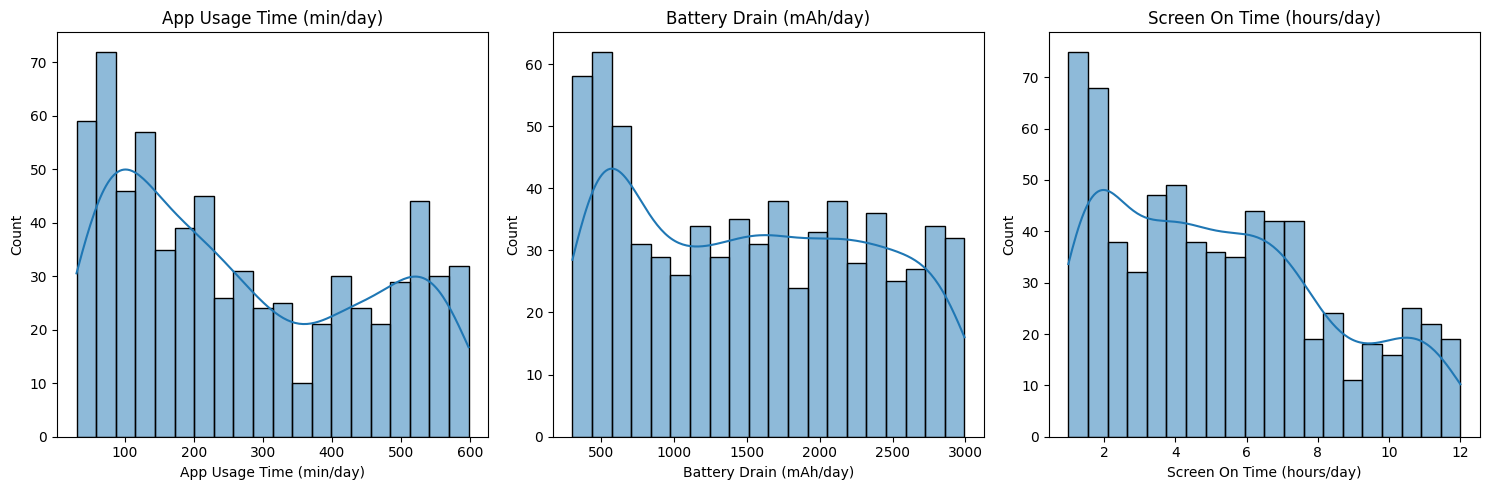

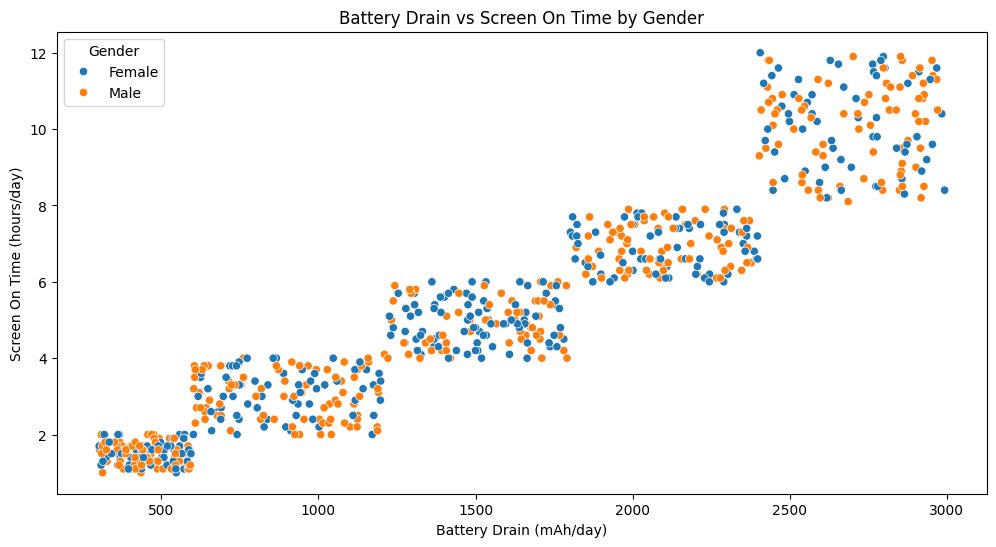

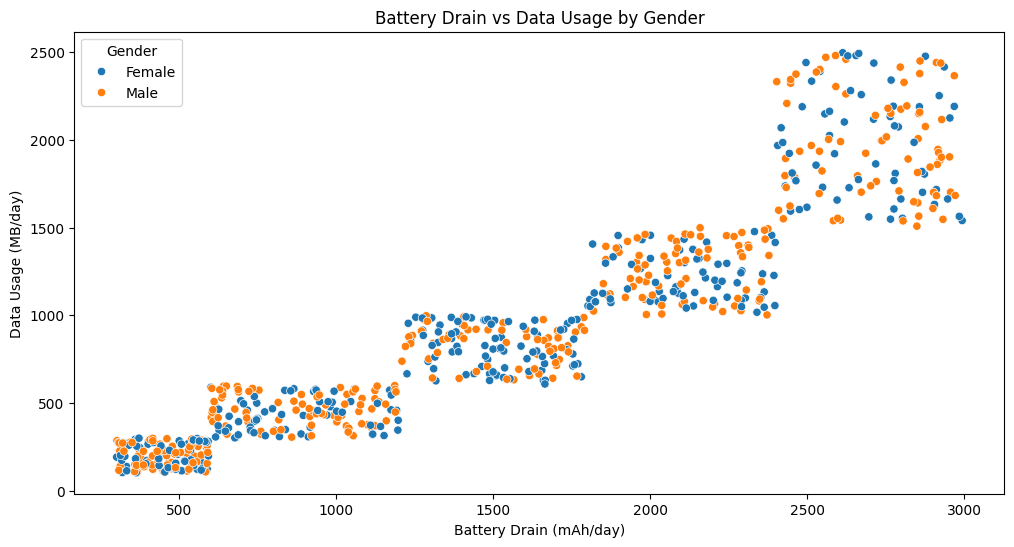

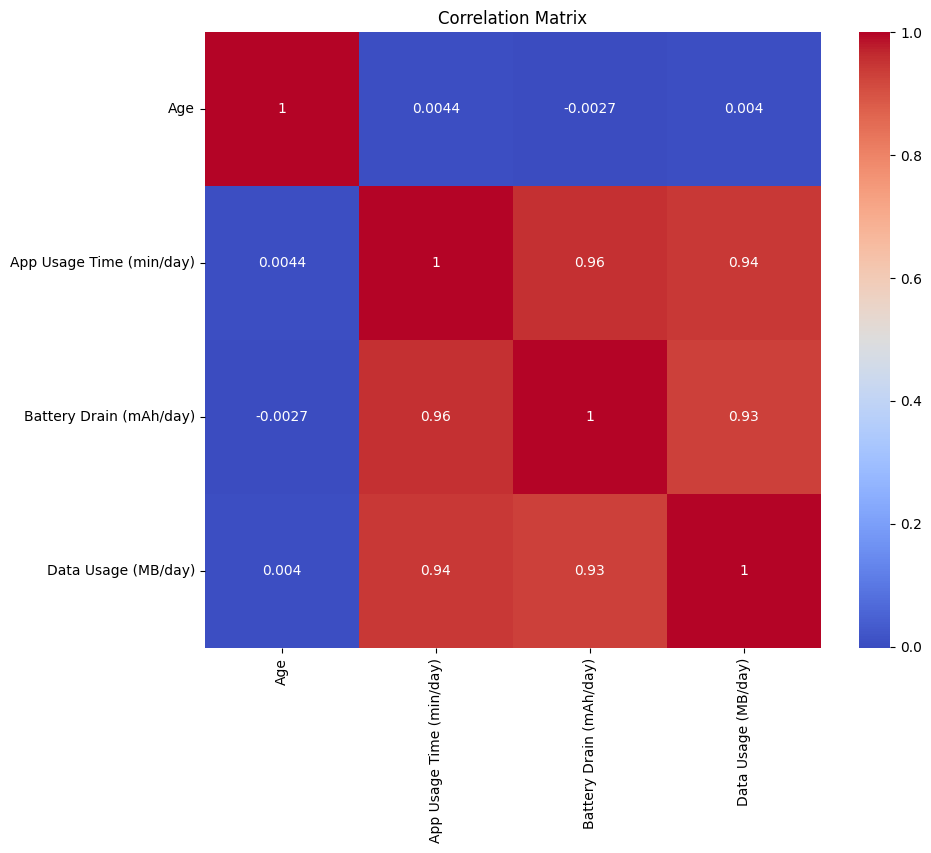

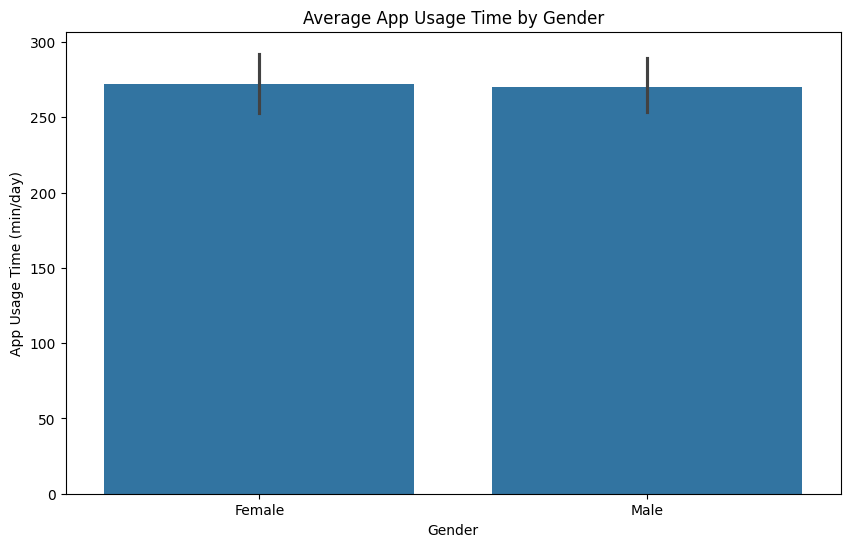

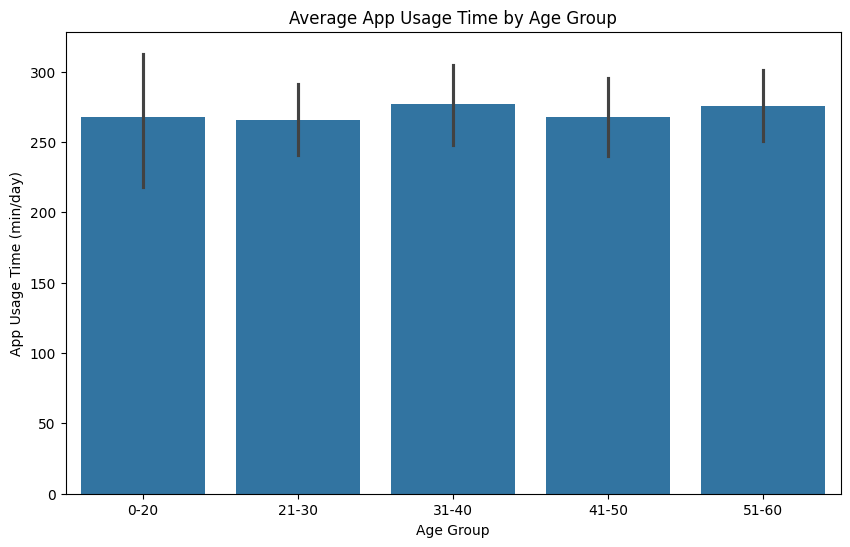

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset


# Ensure categorical and numerical columns are appropriately set (if not done already)
df["Operating System"] = df["Operating System"].astype("category")
df["Gender"] = df["Gender"].astype("category")
df["User Behavior Class"] = df["User Behavior Class"].astype("category")

# Step 1: Descriptive Statistics
# Calculate summary statistics for key numerical features
summary_stats = df[['App Usage Time (min/day)', 'Battery Drain (mAh/day)', 'Data Usage (MB/day)']].describe()
print("Summary Statistics:\n", summary_stats)

# Step 2: Visual Exploration
# Histograms for key features
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df['App Usage Time (min/day)'], bins=20, kde=True, ax=axs[0])
axs[0].set_title('App Usage Time (min/day)')

sns.histplot(df['Battery Drain (mAh/day)'], bins=20, kde=True, ax=axs[1])
axs[1].set_title('Battery Drain (mAh/day)')

sns.histplot(df['Screen On Time (hours/day)'], bins=20, kde=True, ax=axs[2])
axs[2].set_title('Screen On Time (hours/day)')
plt.tight_layout()
plt.show()

# Scatter Plots to analyze correlations
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Battery Drain (mAh/day)', y='Screen On Time (hours/day)', hue='Gender')
plt.title('Battery Drain vs Screen On Time by Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Battery Drain (mAh/day)', y='Data Usage (MB/day)', hue='Gender')
plt.title('Battery Drain vs Data Usage by Gender')
plt.show()

# Step 3: Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Age', 'App Usage Time (min/day)', 'Battery Drain (mAh/day)', 'Data Usage (MB/day)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Step 4: Gender and Age Analysis
# Gender-wise bar chart for App Usage Time
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Gender', y='App Usage Time (min/day)', estimator='mean')
plt.title('Average App Usage Time by Gender')
plt.show()

# Age group analysis
# Create age groups
age_bins = [0, 20, 30, 40, 50, 60]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Age group-wise bar chart for App Usage Time
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Age Group', y='App Usage Time (min/day)', estimator='mean')
plt.title('Average App Usage Time by Age Group')
plt.show()


#scaling the values 

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Step 1: Create new features
# Ratio of Screen On Time to App Usage Time
df['Screen to App Usage Ratio'] = df['Screen On Time (hours/day)'] * 60 / df['App Usage Time (min/day)']  # Converted to minutes for consistency

# Battery Drain per App Installed
df['Battery Drain per App'] = df['Battery Drain (mAh/day)'] / df['Number of Apps Installed']

# Step 2: Binning Age into categories
# Define age bins and labels
age_bins = [0, 18, 25, 35, 45, 60, 100]  # Including a high upper bound for older ages
age_labels = ['<18', '18-25', '26-35', '36-45', '46-60', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Step 3: Create a Heavy User binary variable
# Define thresholds
app_usage_threshold = 300  # For example, 300 min/day
data_usage_threshold = 1000  # For example, 1000 MB/day

# Create binary column
df['Heavy User'] = ((df['App Usage Time (min/day)'] > app_usage_threshold) |
                    (df['Data Usage (MB/day)'] > data_usage_threshold)).astype(int)

# Step 4: Normalization of selected features
scaler = MinMaxScaler()
df[['App Usage Time (min/day)', 'Data Usage (MB/day)']] = scaler.fit_transform(df[['App Usage Time (min/day)', 'Data Usage (MB/day)']])

# View the new features and check results
print(df[['Screen to App Usage Ratio', 'Battery Drain per App', 'Age Group', 'Heavy User', 'App Usage Time (min/day)', 'Data Usage (MB/day)']].head())


   Screen to App Usage Ratio  Battery Drain per App Age Group  Heavy User  \
0                   0.977099              27.940299     36-45           1   
1                   1.052239              31.690476     46-60           0   
2                   1.558442              23.781250     36-45           0   
3                   1.205021              29.928571     18-25           0   
4                   1.379679              23.568966     26-35           0   

   App Usage Time (min/day)  Data Usage (MB/day)  
0                  0.639085             0.425887  
1                  0.419014             0.351566  
2                  0.218310             0.091858  
3                  0.367958             0.321086  
4                  0.276408             0.369937  


#selecting relevant feature for KNN

In [9]:
import pandas as pd
import numpy as np
from scipy.spatial import distance

# Load the datas

# Select relevant features for KNN
features = df[['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
            'Battery Drain (mAh/day)', 'Data Usage (MB/day)', 'Age']]

# Convert selected columns to a numpy array for efficient computation
data_points = features.values

# Compute pairwise Euclidean distances between all users
num_users = len(data_points)
distance_matrix = np.zeros((num_users, num_users))

for i in range(num_users):
    for j in range(i + 1, num_users):
        euclidean_dist = np.linalg.norm(data_points[i] - data_points[j])
        distance_matrix[i][j] = euclidean_dist
        distance_matrix[j][i] = euclidean_dist  # Symmetric matrix

# Display a sample of the distance matrix
distance_df = pd.DataFrame(distance_matrix, columns=df['User ID'], index=df['User ID'])
print("Sample of Pairwise Euclidean Distance Matrix:")
print(distance_df.head())

# Example: Find the 5 nearest neighbors for the first user
k = 5
first_user_distances = distance_df.iloc[0].sort_values()
nearest_neighbors = first_user_distances[1:k+1]  # Exclude self-distance
print(f"\nTop {k} nearest neighbors for User ID {df['User ID'][0]}:")
print(nearest_neighbors)


Sample of Pairwise Euclidean Distance Matrix:
User ID          1           2            3           4           5    \
User ID                                                                 
1           0.000000  541.048005  1111.004522  197.024477  505.084691   
2         541.048005    0.000000   570.022454  346.054928   39.397724   
3        1111.004522  570.022454     0.000000  915.264833  606.099968   
4         197.024477  346.054928   915.264833    0.000000  309.196153   
5         505.084691   39.397724   606.099968  309.196153    0.000000   

User ID         6            7            8            9            10   ...  \
User ID                                                                  ...   
1        932.054012    72.538380  1084.048951   266.010713    85.023812  ...   
2        391.336688   471.724266  1625.092682   807.021077   626.022929  ...   
3        179.348877  1041.217126  2195.040219  1377.005044  1196.002990  ...   
4        736.087574   126.028941  1280.064

#Applying standared scaler for scaling the values 

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Data Preprocessing
# Check for categorical columns with ordered categories
for col in df.columns:
    if isinstance(df[col].dtype, pd.CategoricalDtype) or df[col].dtype == 'object':
        # If the column is categorical with ordered categories, convert it to integers manually
        if isinstance(df[col].dtype, pd.CategoricalDtype) and df[col].cat.ordered:
            df[col] = df[col].cat.codes  # Convert ordered categories to integer codes
        else:
            # For unordered categorical columns, use LabelEncoder
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])

# Verify all columns are numeric after encoding
print(df.dtypes)  # Ensure no column is of 'object' or 'CategoricalDtype'

# Selecting features and target
X = df.drop(columns=['User ID', 'User Behavior Class'])  # Drop User ID and target
y = df['User Behavior Class']

# Ensure all features in X are numeric (sanity check)
if not all(X.dtypes.apply(lambda x: np.issubdtype(x, np.number))):
    print("Warning: Non-numeric data detected in X after encoding.")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Selection and Training ###
# (Continue with the rest of your model training and evaluation steps here, as provided previously)


User ID                         int64
Device Model                    int32
Operating System                int32
App Usage Time (min/day)      float64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)           float64
Age                             int64
Gender                          int32
User Behavior Class             int64
Age Group                        int8
Screen to App Usage Ratio     float64
Battery Drain per App         float64
Heavy User                      int32
dtype: object


#applying models like KNN NAVIE BAYIES   GRADIENT DECENT

Best k for KNN: 10
Best depth for Decision Tree: 3

KNN Performance:
Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92
Confusion Matrix:
 [[24  3  0  0  0]
 [ 5 21  3  0  0]
 [ 0  0 34  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 23]]


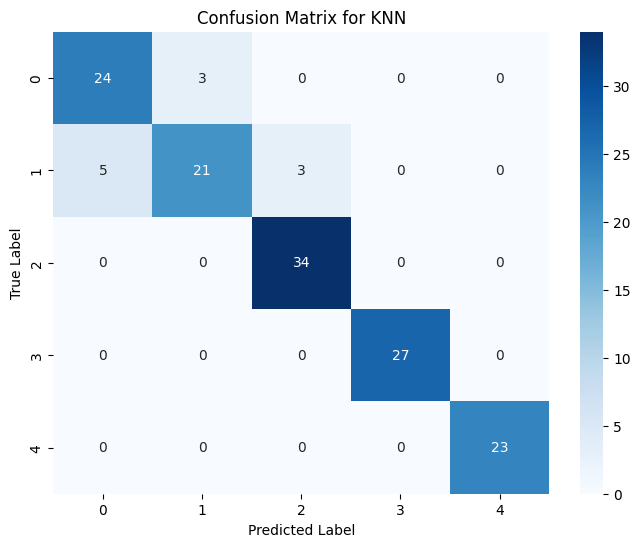


Decision Tree Performance:
Accuracy: 0.76
Precision: 0.65
Recall: 0.76
F1 Score: 0.68
Confusion Matrix:
 [[27  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0 34  0  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 23]]


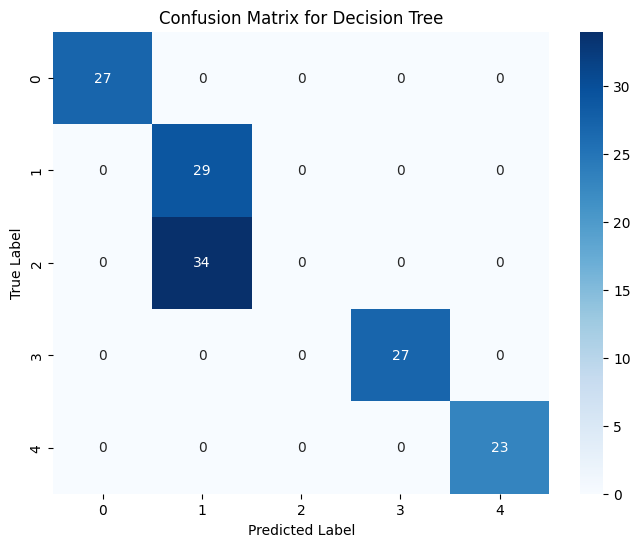


Naive Bayes Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
 [[27  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 34  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 23]]


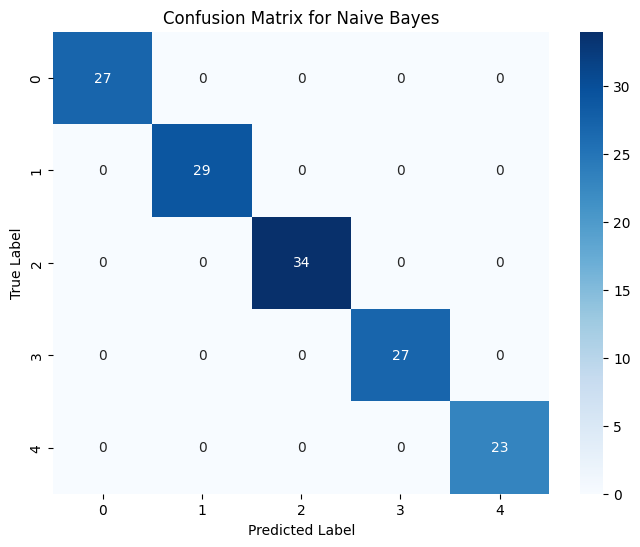

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Dictionary to store model performance
model_performance = {}

### Model 1: K-Nearest Neighbors (KNN) ###
# Experiment with different values of k (3, 5, 7, 10) using cross-validation to find the best k
knn_accuracies = {}
for k in [3, 5, 7, 10]:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    knn_accuracies[k] = scores.mean()

# Select the best k based on cross-validation scores
best_k = max(knn_accuracies, key=knn_accuracies.get)
print(f"Best k for KNN: {best_k}")

# Train KNN model with the best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Make predictions and evaluate KNN
y_pred_knn = knn.predict(X_test)
model_performance['KNN'] = {
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn, average='weighted', zero_division=0),
    'Recall': recall_score(y_test, y_pred_knn, average='weighted', zero_division=0),
    'F1 Score': f1_score(y_test, y_pred_knn, average='weighted', zero_division=0),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_knn)
}

### Model 2: Decision Tree ###
# Tune tree depth to control overfitting and improve accuracy
dt_accuracies = {}
for depth in [3, 5, 7, 10]:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
    dt_accuracies[depth] = scores.mean()

# Select the best depth based on cross-validation scores
best_depth = max(dt_accuracies, key=dt_accuracies.get)
print(f"Best depth for Decision Tree: {best_depth}")

# Train Decision Tree with the best depth
dt = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt.fit(X_train, y_train)

# Make predictions and evaluate Decision Tree
y_pred_dt = dt.predict(X_test)
model_performance['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt, average='weighted', zero_division=0),
    'Recall': recall_score(y_test, y_pred_dt, average='weighted', zero_division=0),
    'F1 Score': f1_score(y_test, y_pred_dt, average='weighted', zero_division=0),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_dt)
}

### Model 3: Naive Bayes ###
# Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions and evaluate Naive Bayes
y_pred_nb = nb.predict(X_test)
model_performance['Naive Bayes'] = {
    'Accuracy': accuracy_score(y_test, y_pred_nb),
    'Precision': precision_score(y_test, y_pred_nb, average='weighted', zero_division=0),
    'Recall': recall_score(y_test, y_pred_nb, average='weighted', zero_division=0),
    'F1 Score': f1_score(y_test, y_pred_nb, average='weighted', zero_division=0),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_nb)
}

### Display Model Performance and Visualize Confusion Matrices ###
for model_name, metrics in model_performance.items():
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"Precision: {metrics['Precision']:.2f}")
    print(f"Recall: {metrics['Recall']:.2f}")
    print(f"F1 Score: {metrics['F1 Score']:.2f}")
    print("Confusion Matrix:\n", metrics['Confusion Matrix'])
    
    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


#visulizing Model Performance 

Best k for KNN: 10
Best depth for Decision Tree: 3, Best min_samples_leaf: 1
Best var_smoothing for Naive Bayes: 0.1

KNN Performance:
Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92
Confusion Matrix:
 [[24  3  0  0  0]
 [ 5 21  3  0  0]
 [ 0  0 34  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 23]]


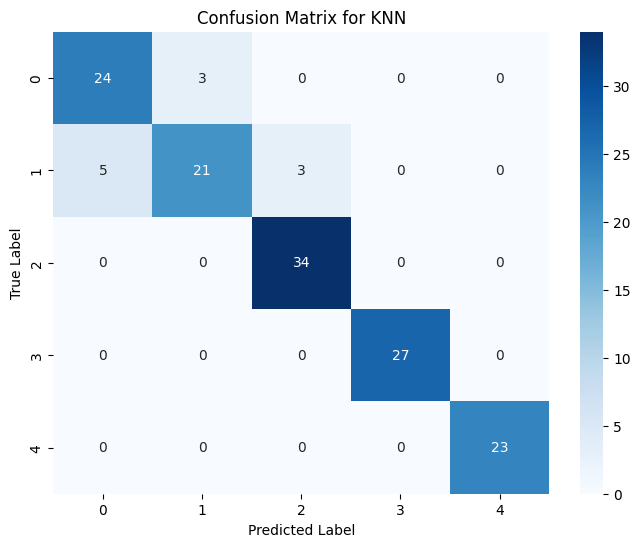


Decision Tree Performance:
Accuracy: 0.76
Precision: 0.65
Recall: 0.76
F1 Score: 0.68
Confusion Matrix:
 [[27  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0 34  0  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 23]]


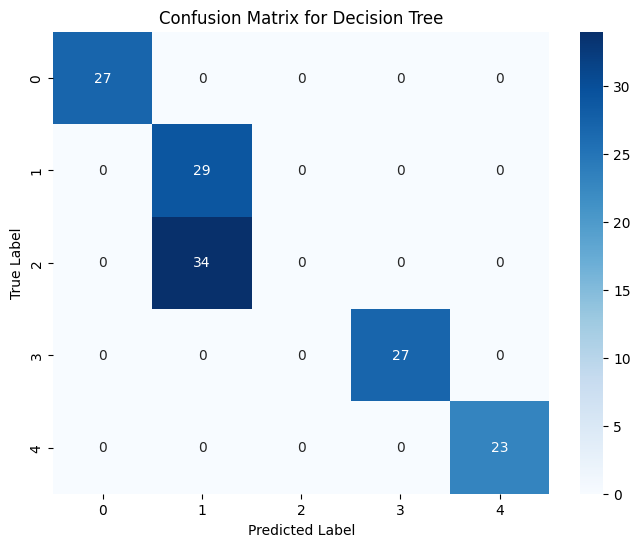


Naive Bayes Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
 [[27  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 34  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 23]]


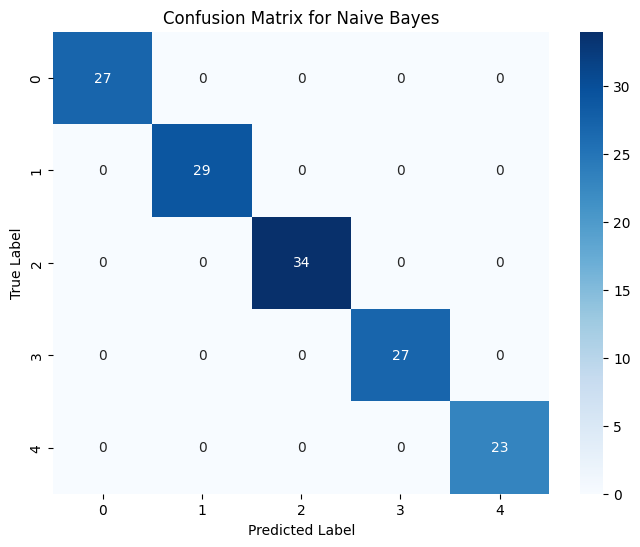

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Dictionary to store model performance
model_performance = {}

### Hyperparameter Tuning for KNN ###
# Set up the parameter grid for KNN
knn_param_grid = {'n_neighbors': [3, 5, 7, 10]}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)

# Best parameters for KNN
best_k = knn_grid.best_params_['n_neighbors']
print(f"Best k for KNN: {best_k}")

# Train KNN model with the best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Make predictions and evaluate KNN
y_pred_knn = knn.predict(X_test)
model_performance['KNN'] = {
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn, average='weighted', zero_division=0),
    'Recall': recall_score(y_test, y_pred_knn, average='weighted', zero_division=0),
    'F1 Score': f1_score(y_test, y_pred_knn, average='weighted', zero_division=0),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_knn)
}

### Hyperparameter Tuning for Decision Tree ###
# Set up the parameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [1, 2, 3, 5]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)

# Best parameters for Decision Tree
best_depth = dt_grid.best_params_['max_depth']
best_min_samples_leaf = dt_grid.best_params_['min_samples_leaf']
print(f"Best depth for Decision Tree: {best_depth}, Best min_samples_leaf: {best_min_samples_leaf}")

# Train Decision Tree with the best parameters
dt = DecisionTreeClassifier(max_depth=best_depth, min_samples_leaf=best_min_samples_leaf, random_state=42)
dt.fit(X_train, y_train)

# Make predictions and evaluate Decision Tree
y_pred_dt = dt.predict(X_test)
model_performance['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt, average='weighted', zero_division=0),
    'Recall': recall_score(y_test, y_pred_dt, average='weighted', zero_division=0),
    'F1 Score': f1_score(y_test, y_pred_dt, average='weighted', zero_division=0),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_dt)
}

### Hyperparameter Tuning for Naive Bayes ###
# For GaussianNB, we use the "var_smoothing" parameter to adjust the Laplace smoothing
nb_param_grid = {'var_smoothing': np.logspace(0, -9, num=10)}
nb_grid = GridSearchCV(GaussianNB(), nb_param_grid, cv=5, scoring='accuracy')
nb_grid.fit(X_train, y_train)

# Best parameter for Naive Bayes
best_var_smoothing = nb_grid.best_params_['var_smoothing']
print(f"Best var_smoothing for Naive Bayes: {best_var_smoothing}")

# Train Naive Bayes model with the best parameter
nb = GaussianNB(var_smoothing=best_var_smoothing)
nb.fit(X_train, y_train)

# Make predictions and evaluate Naive Bayes
y_pred_nb = nb.predict(X_test)
model_performance['Naive Bayes'] = {
    'Accuracy': accuracy_score(y_test, y_pred_nb),
    'Precision': precision_score(y_test, y_pred_nb, average='weighted', zero_division=0),
    'Recall': recall_score(y_test, y_pred_nb, average='weighted', zero_division=0),
    'F1 Score': f1_score(y_test, y_pred_nb, average='weighted', zero_division=0),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_nb)
}

### Display Model Performance and Visualize Confusion Matrices ###
for model_name, metrics in model_performance.items():
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"Precision: {metrics['Precision']:.2f}")
    print(f"Recall: {metrics['Recall']:.2f}")
    print(f"F1 Score: {metrics['F1 Score']:.2f}")
    print("Confusion Matrix:\n", metrics['Confusion Matrix'])
    
    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


#Hyper Parametre tuning

Best k for KNN: 3
KNN Cross-Validation Scores: [1.         1.         1.         0.99107143 0.99107143]
Best depth for Decision Tree: 5, Best min_samples_leaf: 1
Decision Tree Cross-Validation Scores: [1. 1. 1. 1. 1.]
Best var_smoothing for Naive Bayes: 1e-08
Naive Bayes Cross-Validation Scores: [1. 1. 1. 1. 1.]

Comparison of Model Performance:


<Figure size 1200x800 with 0 Axes>

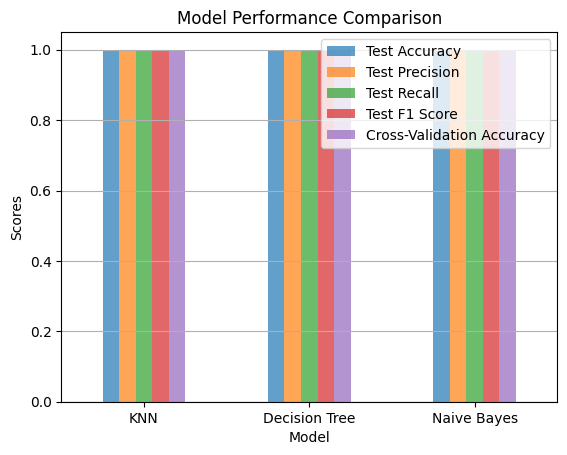

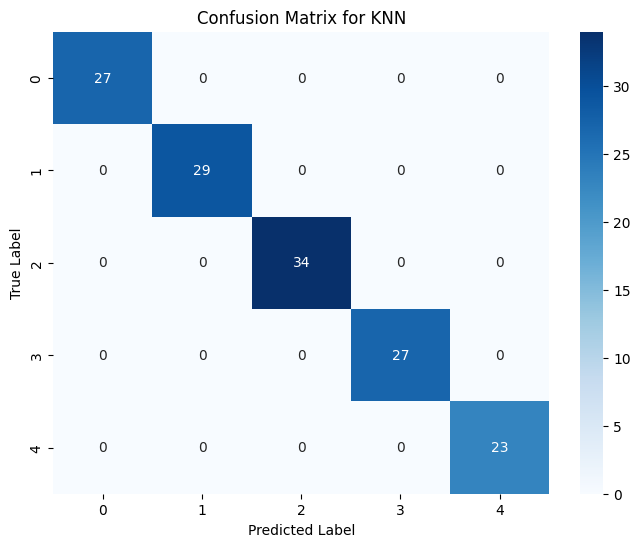

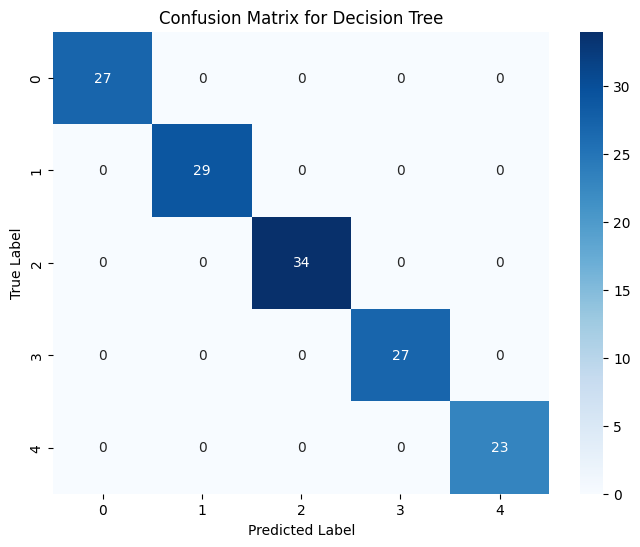

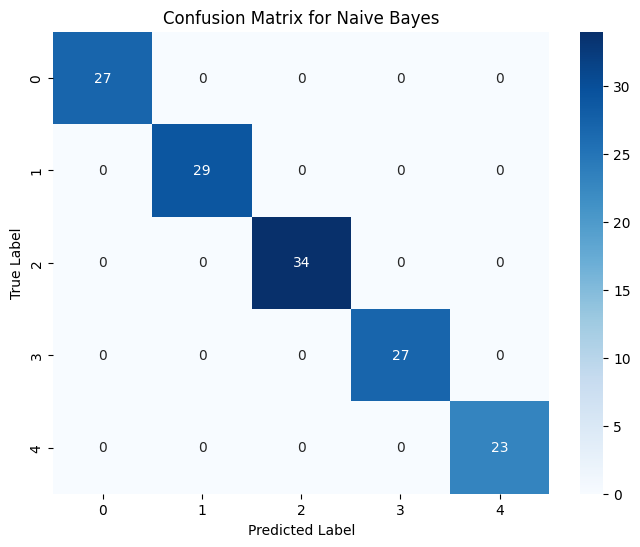

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming df is already defined and preprocessed
# Define features and target
X = df.drop(columns=['User ID', 'User Behavior Class'])  # Drop User ID and target
y = df['User Behavior Class']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to store model performance
model_performance = {}

### Hyperparameter Tuning for KNN ###
knn_param_grid = {'n_neighbors': [3, 5, 7, 10]}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=kf, scoring='accuracy')
knn_grid.fit(X_train, y_train)

# Best parameters for KNN
best_k = knn_grid.best_params_['n_neighbors']
print(f"Best k for KNN: {best_k}")

# Train KNN model with the best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Cross-validation on the training set
knn_cv_scores = cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy')
print(f"KNN Cross-Validation Scores: {knn_cv_scores}")

# Evaluate KNN on the test set
y_pred_knn = knn.predict(X_test)
knn_performance = {
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn, average='weighted', zero_division=0),
    'Recall': recall_score(y_test, y_pred_knn, average='weighted', zero_division=0),
    'F1 Score': f1_score(y_test, y_pred_knn, average='weighted', zero_division=0),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_knn)
}

model_performance['KNN'] = knn_performance

### Hyperparameter Tuning for Decision Tree ###
dt_param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [1, 2, 3, 5]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=kf, scoring='accuracy')
dt_grid.fit(X_train, y_train)

# Best parameters for Decision Tree
best_depth = dt_grid.best_params_['max_depth']
best_min_samples_leaf = dt_grid.best_params_['min_samples_leaf']
print(f"Best depth for Decision Tree: {best_depth}, Best min_samples_leaf: {best_min_samples_leaf}")

# Train Decision Tree with the best parameters
dt = DecisionTreeClassifier(max_depth=best_depth, min_samples_leaf=best_min_samples_leaf, random_state=42)
dt.fit(X_train, y_train)

# Cross-validation on the training set
dt_cv_scores = cross_val_score(dt, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Decision Tree Cross-Validation Scores: {dt_cv_scores}")

# Evaluate Decision Tree on the test set
y_pred_dt = dt.predict(X_test)
dt_performance = {
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt, average='weighted', zero_division=0),
    'Recall': recall_score(y_test, y_pred_dt, average='weighted', zero_division=0),
    'F1 Score': f1_score(y_test, y_pred_dt, average='weighted', zero_division=0),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_dt)
}

model_performance['Decision Tree'] = dt_performance

### Hyperparameter Tuning for Naive Bayes ###
nb_param_grid = {'var_smoothing': np.logspace(0, -9, num=10)}
nb_grid = GridSearchCV(GaussianNB(), nb_param_grid, cv=kf, scoring='accuracy')
nb_grid.fit(X_train, y_train)

# Best parameter for Naive Bayes
best_var_smoothing = nb_grid.best_params_['var_smoothing']
print(f"Best var_smoothing for Naive Bayes: {best_var_smoothing}")

# Train Naive Bayes model with the best parameter
nb = GaussianNB(var_smoothing=best_var_smoothing)
nb.fit(X_train, y_train)

# Cross-validation on the training set
nb_cv_scores = cross_val_score(nb, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Naive Bayes Cross-Validation Scores: {nb_cv_scores}")

# Evaluate Naive Bayes on the test set
y_pred_nb = nb.predict(X_test)
nb_performance = {
    'Accuracy': accuracy_score(y_test, y_pred_nb),
    'Precision': precision_score(y_test, y_pred_nb, average='weighted', zero_division=0),
    'Recall': recall_score(y_test, y_pred_nb, average='weighted', zero_division=0),
    'F1 Score': f1_score(y_test, y_pred_nb, average='weighted', zero_division=0),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_nb)
}

model_performance['Naive Bayes'] = nb_performance

### Compare Test Data Performance with Cross-Validation Performance ###
print("\nComparison of Model Performance:")
comparison_metrics = {
    'Model': [],
    'Test Accuracy': [],
    'Test Precision': [],
    'Test Recall': [],
    'Test F1 Score': [],
    'Cross-Validation Accuracy': []
}

for model_name in model_performance.keys():
    comparison_metrics['Model'].append(model_name)
    comparison_metrics['Test Accuracy'].append(model_performance[model_name]['Accuracy'])
    comparison_metrics['Test Precision'].append(model_performance[model_name]['Precision'])
    comparison_metrics['Test Recall'].append(model_performance[model_name]['Recall'])
    comparison_metrics['Test F1 Score'].append(model_performance[model_name]['F1 Score'])
    
    # Calculate and display average cross-validation score
    if model_name == 'KNN':
        avg_cv_score = knn_cv_scores.mean()
    elif model_name == 'Decision Tree':
        avg_cv_score = dt_cv_scores.mean()
    elif model_name == 'Naive Bayes':
        avg_cv_score = nb_cv_scores.mean()
        
    comparison_metrics['Cross-Validation Accuracy'].append(avg_cv_score)

# Convert to DataFrame for easier plotting
comparison_df = pd.DataFrame(comparison_metrics)

# Plot performance metrics comparison
plt.figure(figsize=(12, 8))
comparison_df.set_index('Model').plot(kind='bar', alpha=0.7)
plt.title('Model Performance Comparison')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.axhline(0, color='grey', lw=0.8)
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.show()

# Visualize confusion matrices
for model_name in model_performance.keys():
    plt.figure(figsize=(8, 6))
    sns.heatmap(model_performance[model_name]['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


#serilizing the model using joblib

In [ ]:
import joblib


# Save the KNN model
joblib.dump(knn, 'knn_model.pkl')

# Save the Decision Tree model
joblib.dump(dt, 'decision_tree_model.pkl')

# Save the Naive Bayes model
joblib.dump(nb, 'naive_bayes_model.pkl')


['naive_bayes_model.pkl']